In [1]:
import gzip
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Importing the data from UCI Machine Learning Repository

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the dataset
polish_companies_bankruptcy = fetch_ucirepo(id=365)

# Extract the features and targets as pandas DataFrames
X = polish_companies_bankruptcy.data.features
y = polish_companies_bankruptcy.data.targets

# Combine features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

# Suppose the dataset contains a column "company_id" that you want to set as index
# Example: Assuming "company_id" is one of the columns in the dataset
# If "company_id" is not present, you need to specify an appropriate index column

# Set the index (uncomment the following line if "company_id" is an actual column)
data.set_index("year", inplace=True)

# Display the DataFrame
print(data.head())

# If "company_id" is not a column in the dataset, you might need to generate or specify an appropriate index:
# For example, setting the index to the first column
#data.set_index(data.columns[0], inplace=True)

# Display the updated DataFrame
print(data.head())


            A1       A2       A3      A4       A5       A6        A7       A8  \
year                                                                            
1     0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1     0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
1     0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
1     0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
1     0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

          A9      A10  ...       A56      A57      A58       A59     A60  \
year                   ...                                                 
1     1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160   
1     1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486   
1     1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909   
1     1.0571  0.57353  ...  0.054015  0.14207  0.945

In [5]:
df=pd.DataFrame(data)

In [6]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
year,,,,,,,,,,,,,,,,,,,,,
1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [7]:
df.shape

(43405, 65)

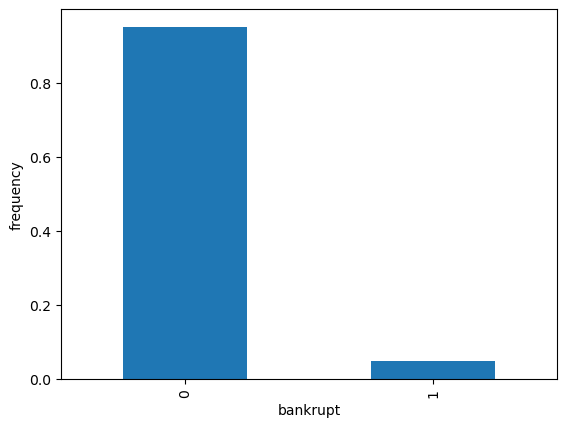

In [8]:
df["class"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency");

In [9]:
import seaborn as sns

<Axes: >

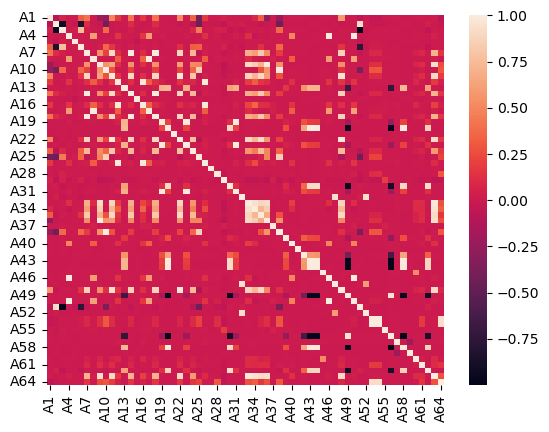

In [10]:
corr = df.drop(columns="class").corr()
sns.heatmap(corr)

# SPLIT

In [11]:
target = "class"
X = df.drop(columns="class")
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (43405, 64)
y shape: (43405,)


# Perform a randomized train-test split using scikit-learn.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34724, 64)
y_train shape: (34724,)
X_test shape: (8681, 64)
y_test shape: (8681,)


# Resample
Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA.
+ One strategy is to resample the training data. 
+ There are many to do this, so let's start with under-sampling.

In [13]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(3300, 64)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
year,,,,,,,,,,,,,,,,,,,,,
3,-0.196780,0.725500,0.18188,3.0821,25.056,0.0,-0.238160,0.37837,0.65133,0.27450,...,4016.60,-0.330730,-0.716850,-0.42584,2.0455,5.1974,6.0054,48.952,7.4563,0.8913
5,0.341250,0.110950,0.59612,6.7003,30.043,0.0,0.420400,8.01330,1.28400,0.88905,...,6654.70,0.331860,0.383830,0.67452,0.0000,2.4704,12.9360,29.729,12.2780,4.2898
4,0.011582,0.824950,0.09303,1.1902,-24.185,0.0,0.011582,0.21219,1.69320,0.17505,...,1161.30,0.018158,0.066162,0.99328,1.6749,8.9392,4.4818,105.440,3.4618,4.0523
2,0.547970,0.077456,0.66822,9.7478,464.280,0.0,0.678620,11.91000,1.34210,0.92254,...,796.30,0.597590,0.593980,0.50191,0.0000,NaN,11.0110,20.775,17.5690,5.2551
4,-0.022274,0.657270,0.29107,1.7282,17.059,0.0,-0.022274,0.52144,1.32110,0.34273,...,262.05,-0.803580,-0.064990,1.00940,0.0000,7.4160,5.4275,110.440,3.3050,4.2729


In [14]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(66148, 64)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,-0.057539,0.44252,0.223210,1.57370,23.3010,0.161160,-0.055615,1.25980,0.94527,0.55748,...,8934.000,-0.057899,-0.10321,1.05790,0.095908,11.846,3.9378,101.98,3.5792,3.5914
1,-0.128080,0.85370,-0.025713,0.96909,-39.4380,-0.031407,-0.128080,0.17137,3.02940,0.14630,...,-1148.500,0.168690,-0.87547,0.85164,0.000000,14.730,5.2979,100.23,3.6416,15.6290
2,-0.104010,0.86107,0.059173,1.06870,1.8093,0.000000,-0.104010,0.16134,2.28140,0.13893,...,27.807,0.196490,-0.74866,0.80469,0.000000,45.658,2.6453,137.76,2.6495,28.6050
3,0.175230,0.76406,0.071079,1.09300,-26.2280,0.175230,0.212090,0.25730,1.05880,0.19660,...,679.300,0.055543,0.89134,0.94446,0.000000,10.222,3.4837,136.74,2.6693,12.3710
4,0.097003,0.69768,-0.129770,0.63575,-92.9040,0.116770,0.097003,0.42044,1.06030,0.29333,...,-3695.500,0.056866,0.33069,0.94313,1.163900,7.850,30.8920,100.27,3.6402,1.6766


# Build Model¶

# Baseline

In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9525


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

# Iterate

+ Creating three identical models: model_reg, model_under and model_over. 
+ All of them should use a SimpleImputer followed by a DecisionTreeClassifier. 
+ Train model_reg using the unaltered training data. 
+ For model_under, use the undersampled data. 
+ For model_over, use the oversampled data.

In [16]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under =  make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over =  make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

# Evaluate

In [17]:
for m in [model_reg, model_under, model_over]:
    acc_train =m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9499
Training Accuracy: 0.8096
Test Accuracy: 0.7879
Training Accuracy: 1.0
Test Accuracy: 0.9521


"Good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

# A Confusion matrix that shows how  best model performs on  validation set.

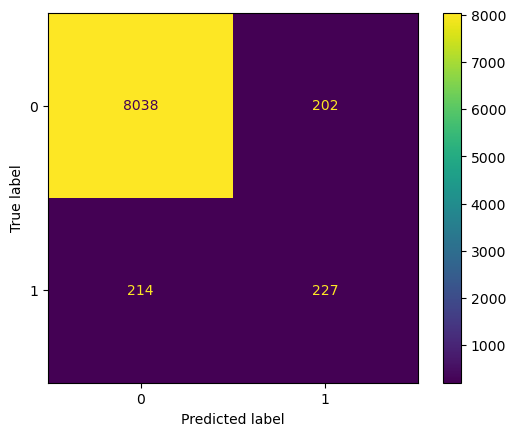

In [18]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);


# The depth of the decision tree in model_over.

In [19]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

48


# Communicating Results

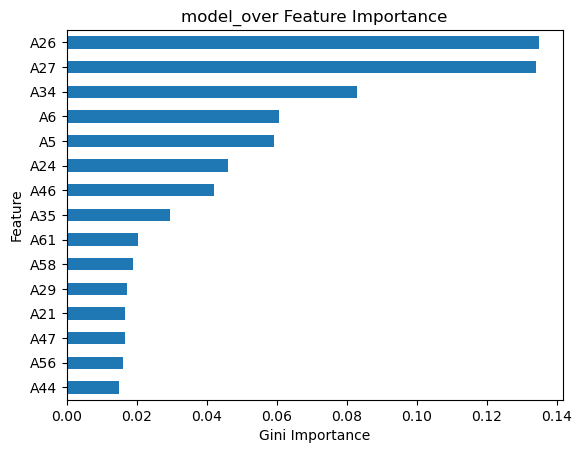

In [20]:
# Get importances
importances = model_over.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()


# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

# Saving the best performing model

In [23]:
# Save your model as `"model-5-2.pkl"`
with open("bestperformingmodel", "wb") as f:
    pickle.dump(model_over, f)

# Loading the best performing model

In [22]:
# Load `"model-5-2.pkl"`
with open("bestperformingmodel", "rb") as f:
    loaded_model=pickle.load(f)

print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])
